# Mobile Price Classification
## Author - Ritika Roy Chowdhury

### Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
sns.set() 

import sys
from ydata_profiling import ProfileReport

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

### Load the dataset

In [3]:
data=pd.read_csv("Downloads/train_dataset.csv")

In [4]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
data.shape

(2000, 21)

In [6]:
data.price_range.value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Checking if any duplicate rows are present

In [10]:
data.duplicated().any()

False

In [11]:
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Visualization on data

<AxesSubplot:xlabel='price_range', ylabel='ram'>

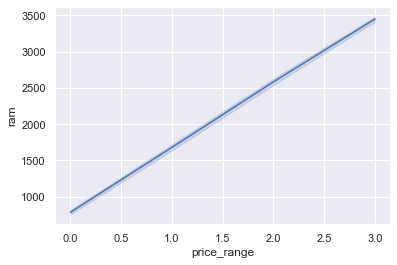

In [13]:
sns.lineplot(data=data,x='price_range',y='ram')

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

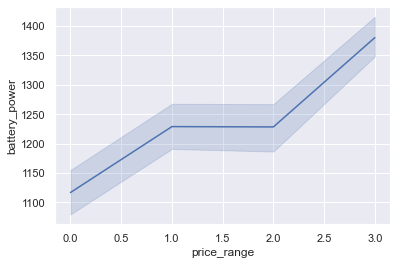

In [14]:
sns.lineplot(data=data,x='price_range',y='battery_power')

<AxesSubplot:xlabel='price_range', ylabel='mobile_wt'>

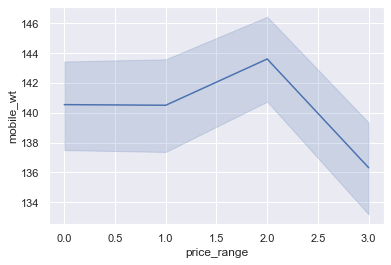

In [15]:
sns.lineplot(data=data,x='price_range',y='mobile_wt')

<AxesSubplot:xlabel='price_range', ylabel='n_cores'>

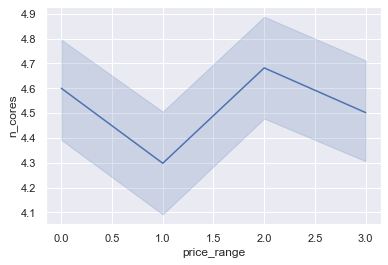

In [16]:
sns.lineplot(data=data,x='price_range',y='n_cores')

<AxesSubplot:xlabel='price_range', ylabel='touch_screen'>

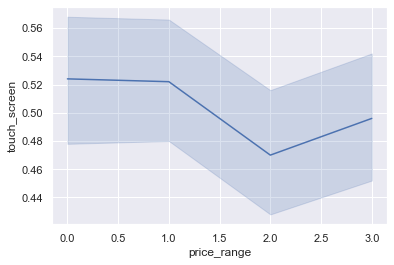

In [17]:
sns.lineplot(data=data,x='price_range',y='touch_screen')

<AxesSubplot:xlabel='price_range', ylabel='four_g'>

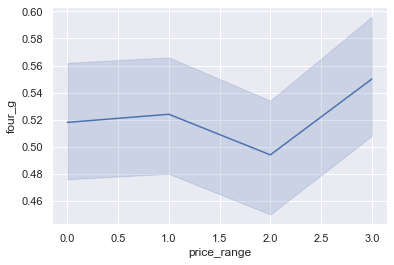

In [18]:
sns.lineplot(data=data,x='price_range',y='four_g')

<AxesSubplot:xlabel='price_range', ylabel='blue'>

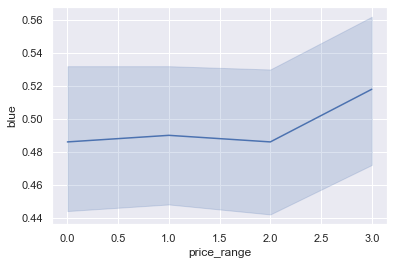

In [19]:
sns.lineplot(data=data,x='price_range',y='blue')

### Counting how many mobiles have bluetooth

In [20]:
data['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

<AxesSubplot:xlabel='blue', ylabel='count'>

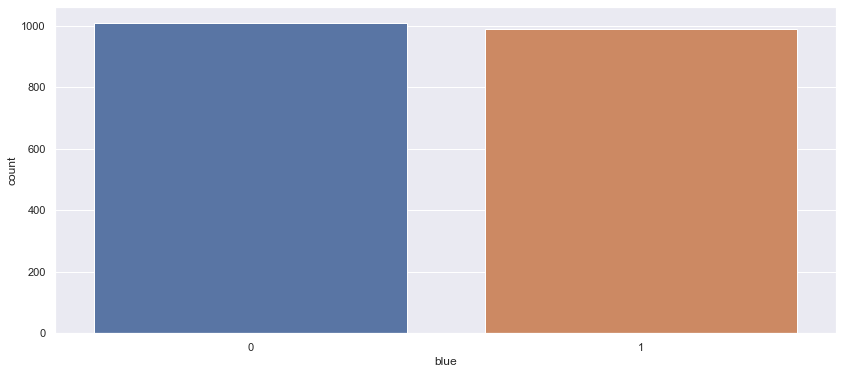

In [21]:
plt.figure(figsize=(14,6))
sns.countplot(data=data,x=data['blue'])

### Correlations between features in training data

In [22]:
data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [23]:
data.corr()['price_range']

battery_power    0.200723
blue             0.020573
clock_speed     -0.006606
dual_sim         0.017444
fc               0.021998
four_g           0.014772
int_memory       0.044435
m_dep            0.000853
mobile_wt       -0.030302
n_cores          0.004399
pc               0.033599
px_height        0.148858
px_width         0.165818
ram              0.917046
sc_h             0.022986
sc_w             0.038711
talk_time        0.021859
three_g          0.023611
touch_screen    -0.030411
wifi             0.018785
price_range      1.000000
Name: price_range, dtype: float64

In [24]:
data.corr()[['price_range','ram']]

,price_range,ram
battery_power,0.200723,-0.000653
blue,0.020573,0.026351
clock_speed,-0.006606,0.003443
dual_sim,0.017444,0.041072
fc,0.021998,0.015099
four_g,0.014772,0.007313
int_memory,0.044435,0.032813
m_dep,0.000853,-0.009434
mobile_wt,-0.030302,-0.002581
n_cores,0.004399,0.004868


### Front cam mega pixels

In [25]:
data.fc.value_counts()

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: fc, dtype: int64

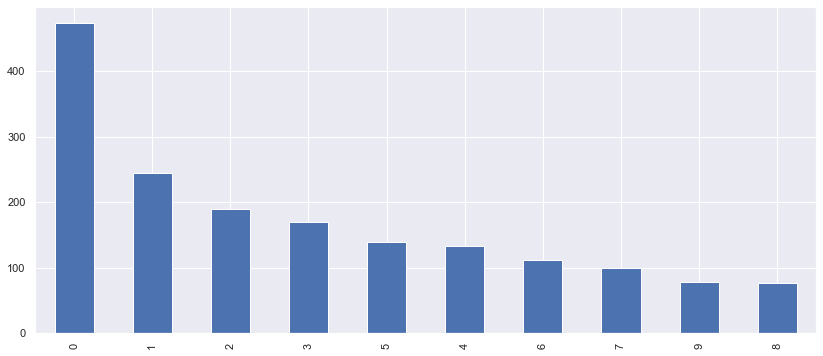

In [26]:
plt.figure(figsize=(14,6))
data.fc.value_counts().head(10).plot(kind='bar')
plt.show()

<AxesSubplot:>

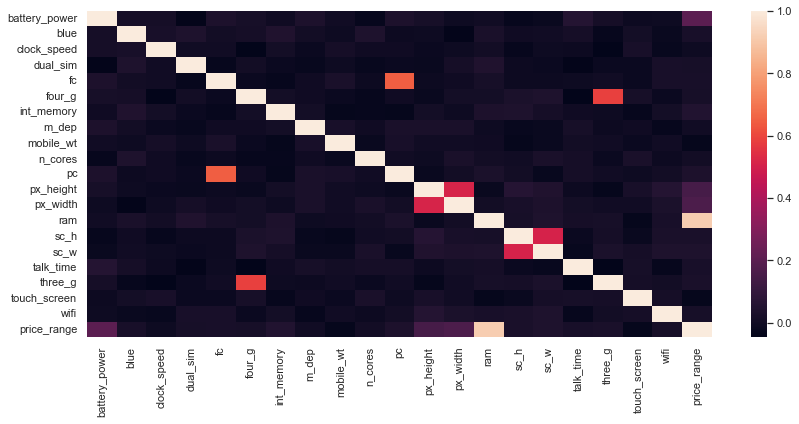

In [27]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr())

<AxesSubplot:>

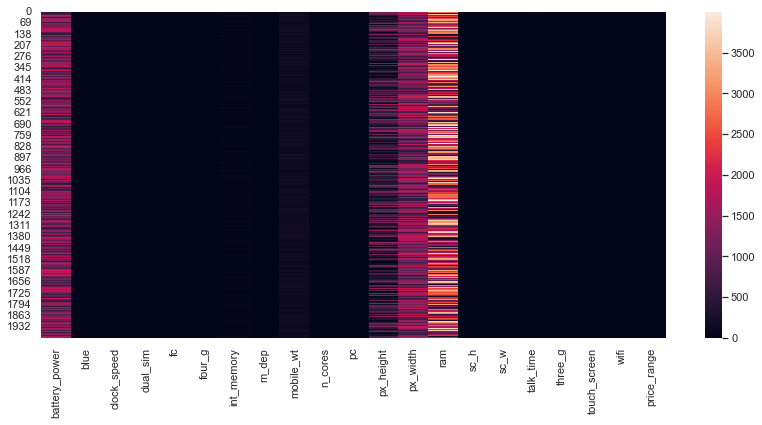

In [28]:
plt.figure(figsize=(14,6))
sns.heatmap(data =data)

<AxesSubplot:>

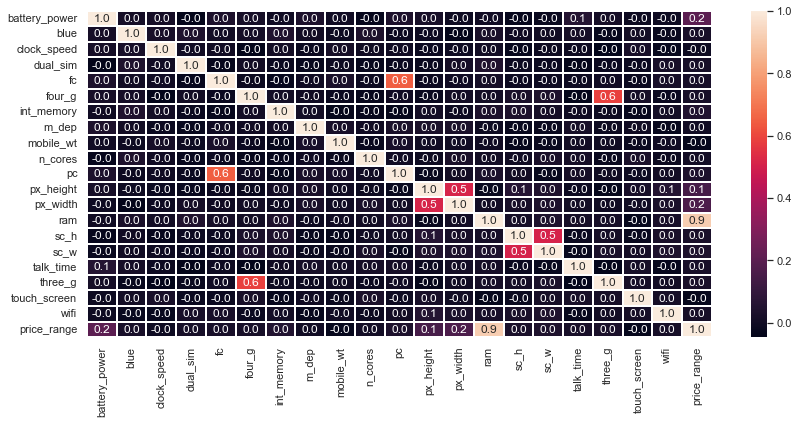

In [29]:
plt.figure(figsize=(14,6))
sns.heatmap(data.corr(),annot=True,fmt='.1f',linewidth=2)

### Number of cores of precessors

In [30]:
data['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

<AxesSubplot:xlabel='n_cores', ylabel='price_range'>

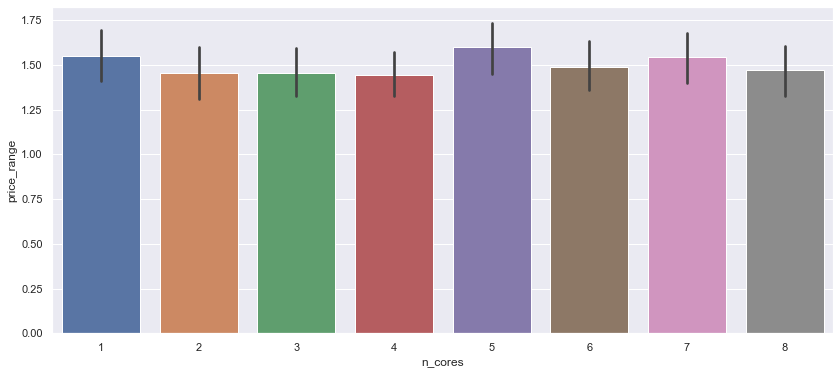

In [31]:
plt.figure(figsize=(14,6))
sns.barplot(x='n_cores',y='price_range',data=data)

### Mobiles have 4G or not

In [32]:
data.four_g.value_counts()

#value=0 indicates mobile doesn't has 4g
#value=1 indicates mobile has 4g

1    1043
0     957
Name: four_g, dtype: int64

<AxesSubplot:>

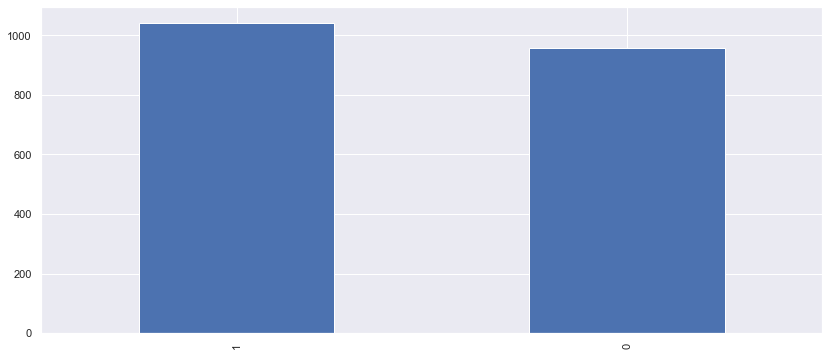

In [33]:
plt.figure(figsize=(14,6))
data.four_g.value_counts().plot(kind='bar')

### Battery Power

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'battery power')

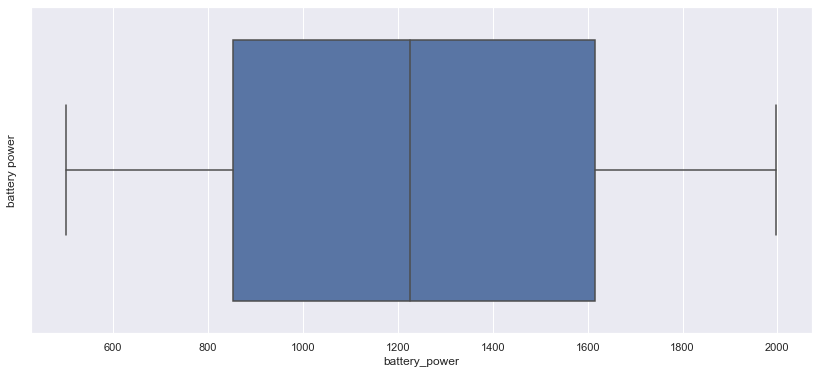

In [34]:
plt.figure(figsize=(14,6))
sns.boxplot(data.battery_power)
plt.ylabel('battery power')

In [35]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<AxesSubplot:xlabel='price_range'>

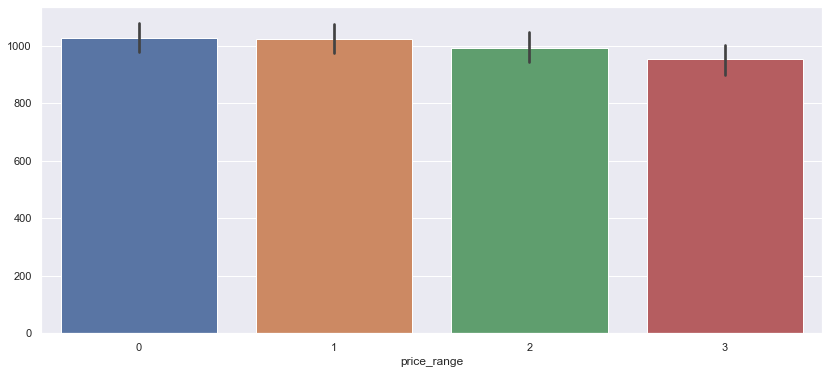

In [36]:
plt.figure(figsize=(14,6))
sns.barplot(data=data,x=data['price_range'],y=data.price_range.index)

<AxesSubplot:xlabel='price_range', ylabel='ram'>

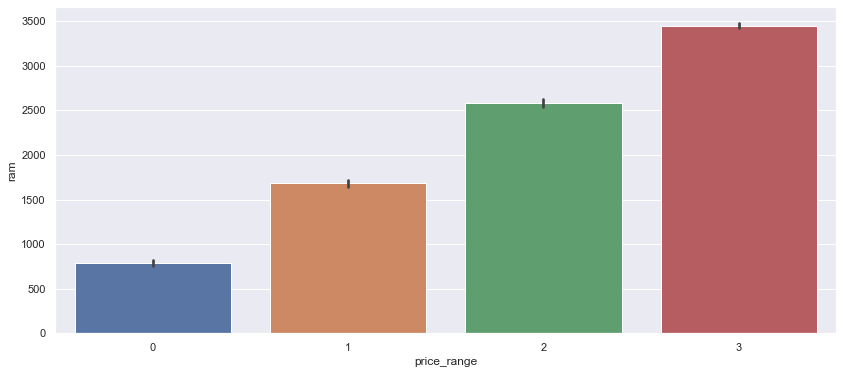

In [37]:
plt.figure(figsize=(14,6))
sns.barplot(data=data,x=data['price_range'],y=data['ram'])

<AxesSubplot:xlabel='price_range', ylabel='ram'>

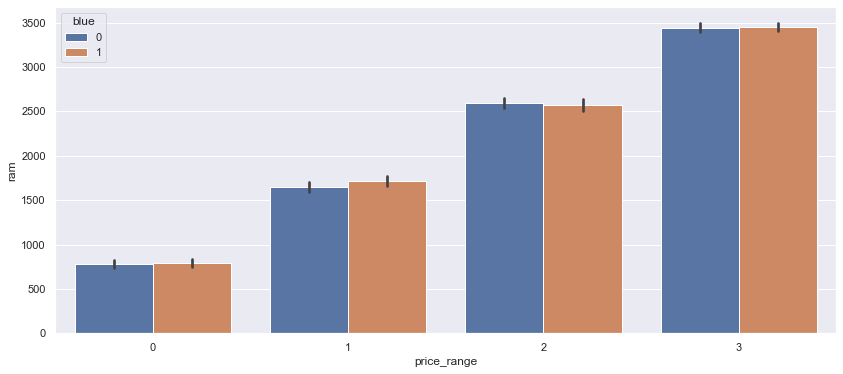

In [38]:
plt.figure(figsize=(14,6))
sns.barplot(data=data,x=data['price_range'],y=data['ram'],hue='blue')

### Talk time and price range

<AxesSubplot:xlabel='talk_time', ylabel='price_range'>

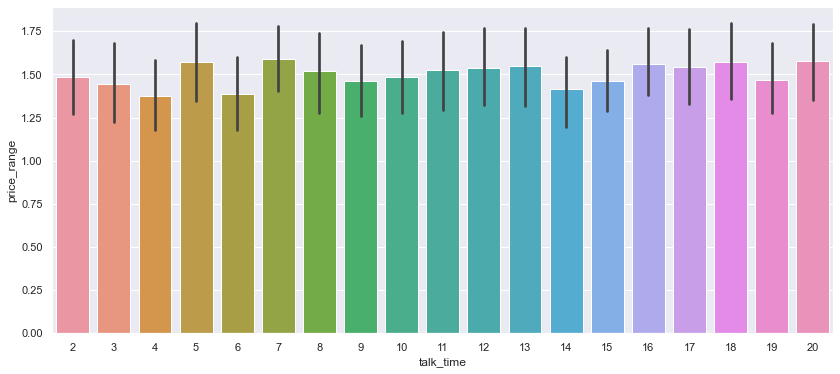

In [39]:
plt.figure(figsize=(14,6))
sns.barplot(data=data,x='talk_time' , y= 'price_range')

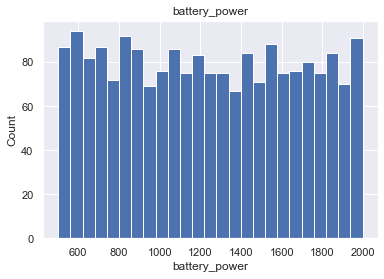

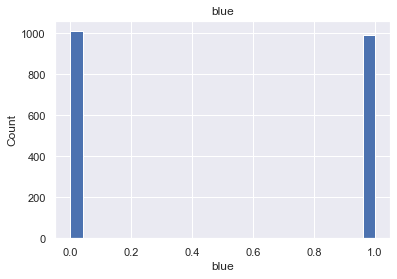

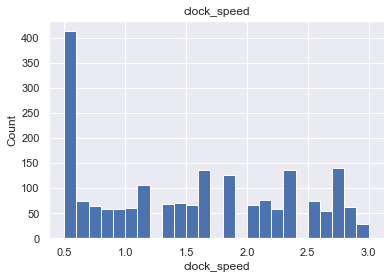

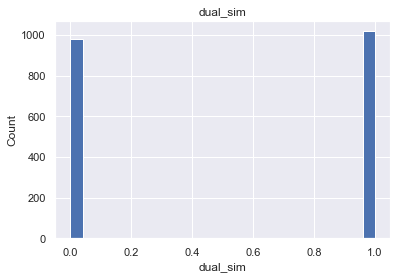

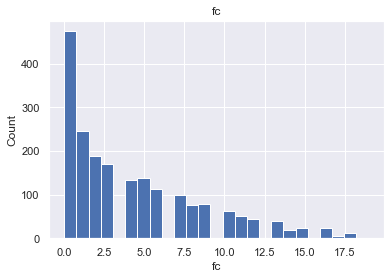

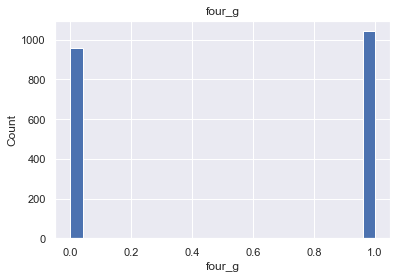

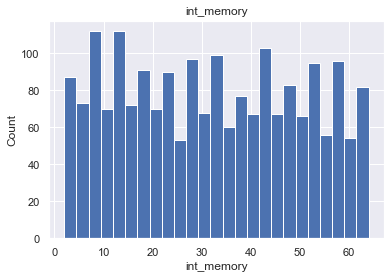

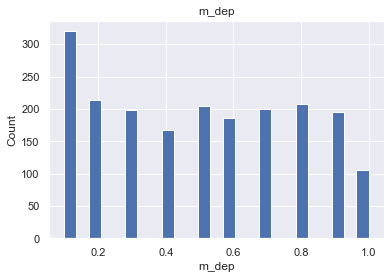

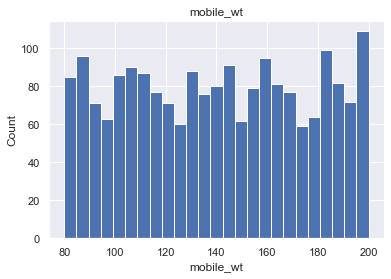

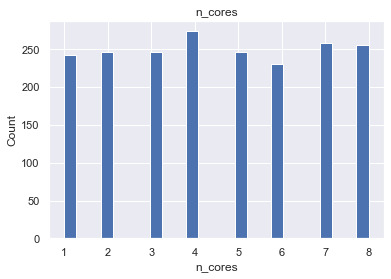

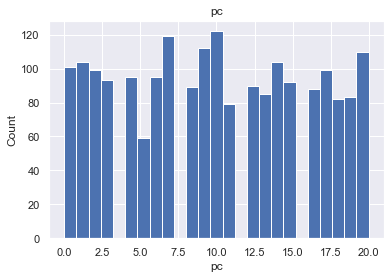

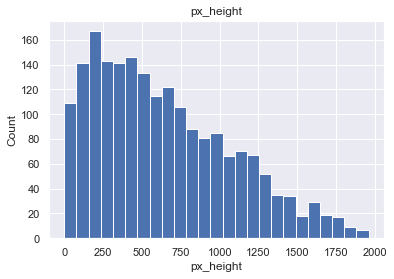

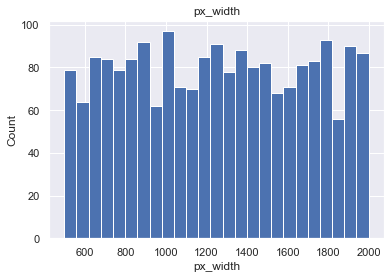

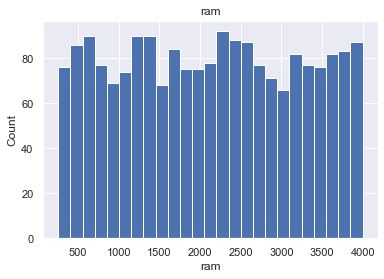

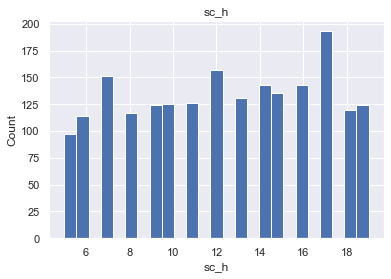

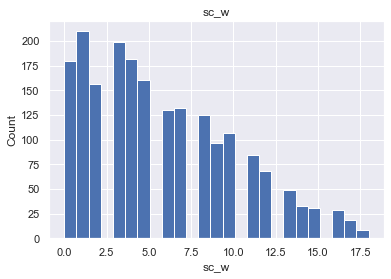

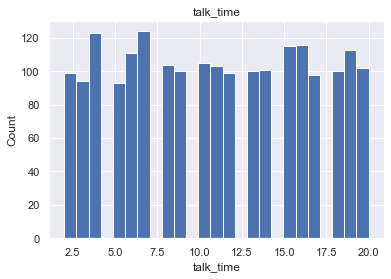

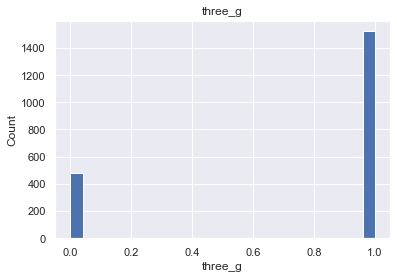

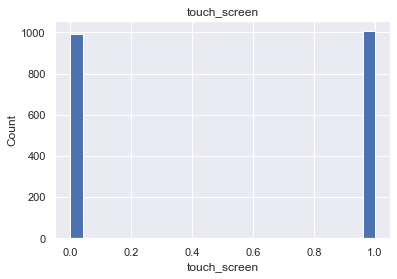

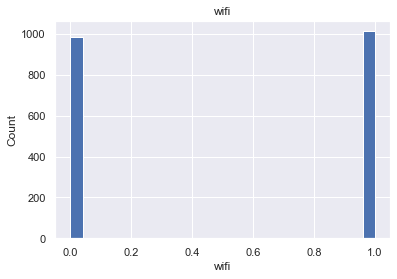

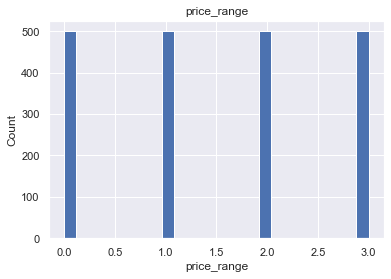

In [40]:
for feature in data:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

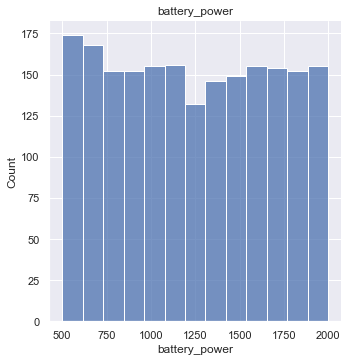

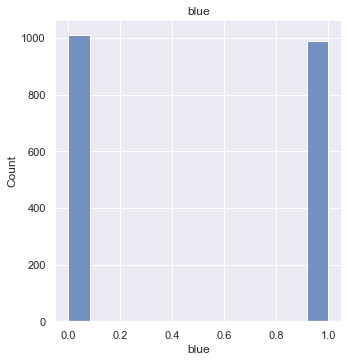

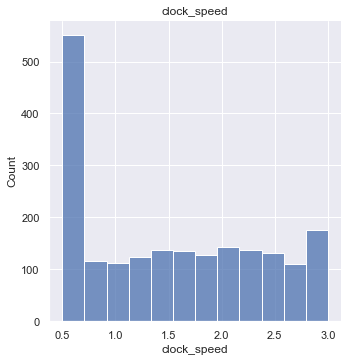

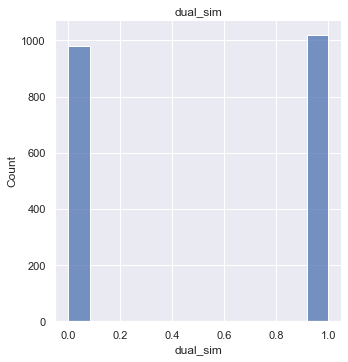

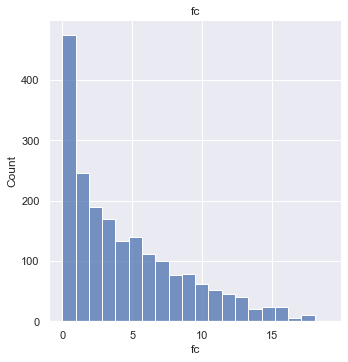

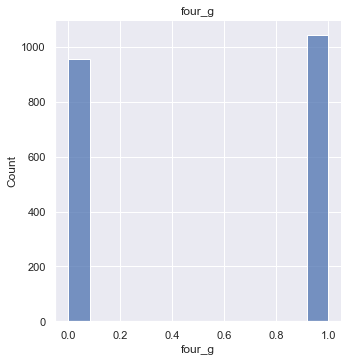

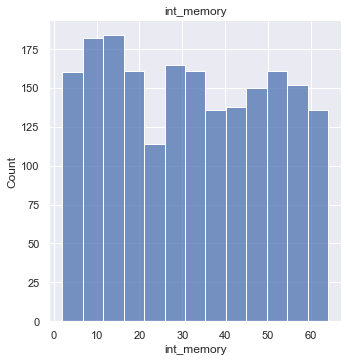

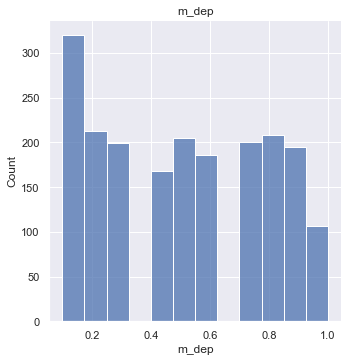

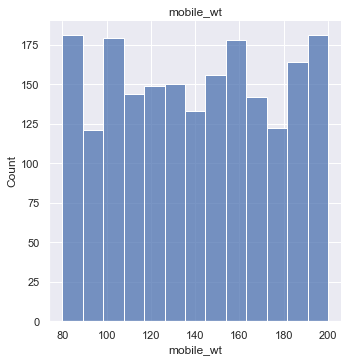

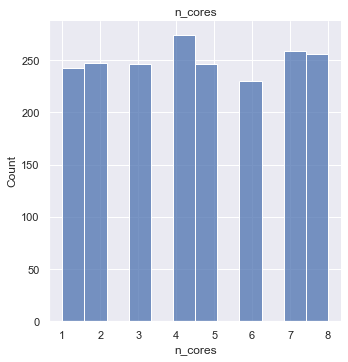

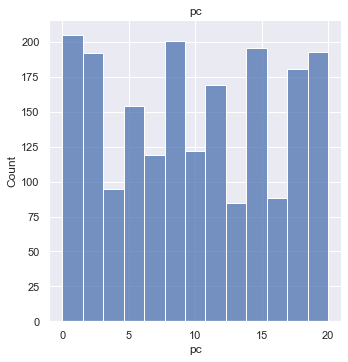

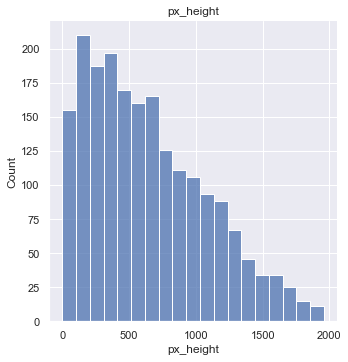

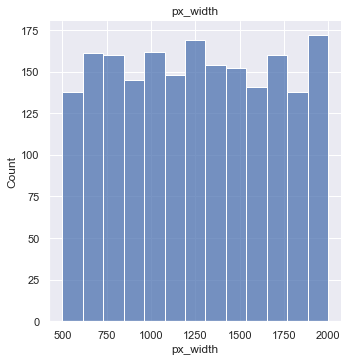

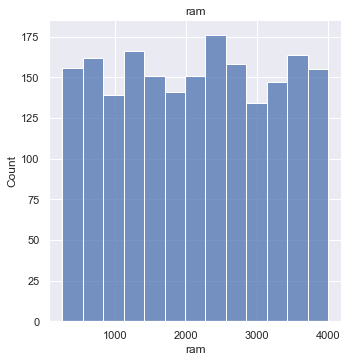

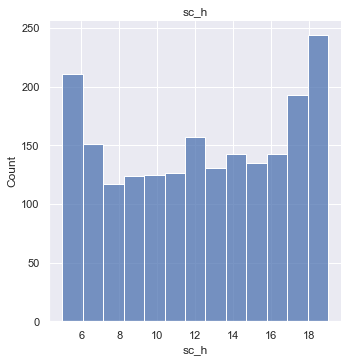

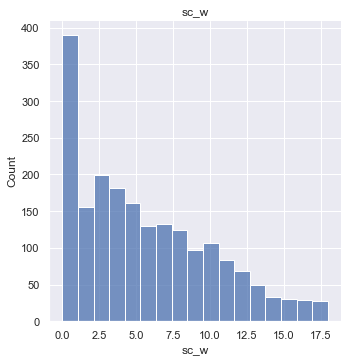

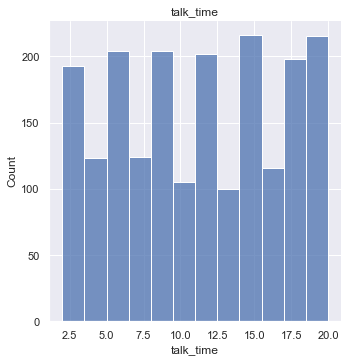

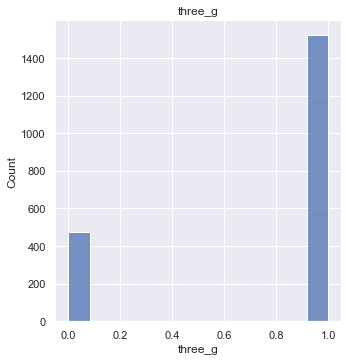

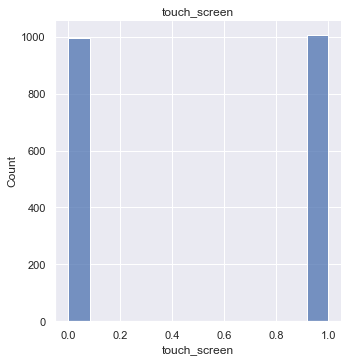

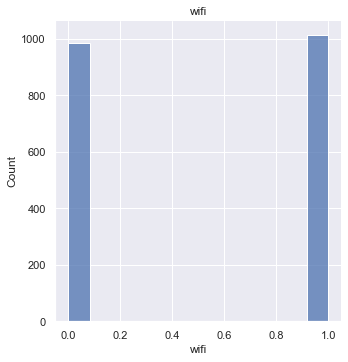

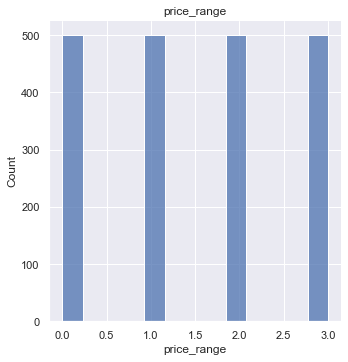

In [41]:
for feature in data:
    data=data.copy()
    sns.displot(data=data,x=feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

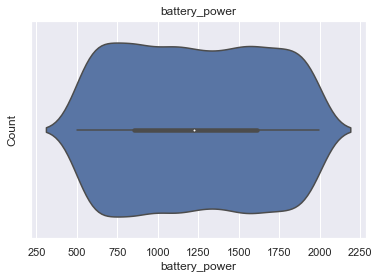

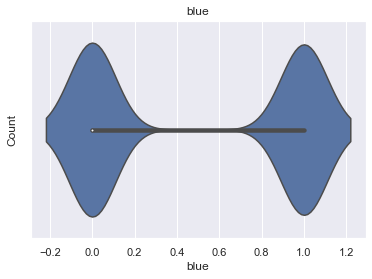

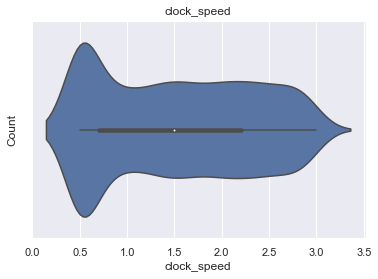

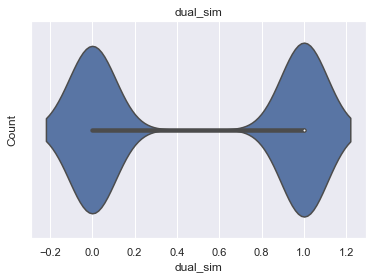

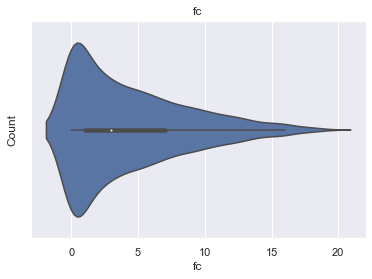

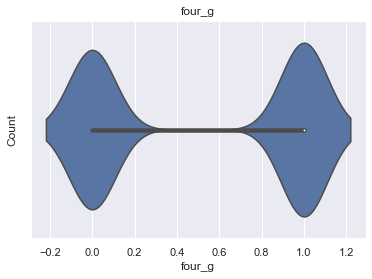

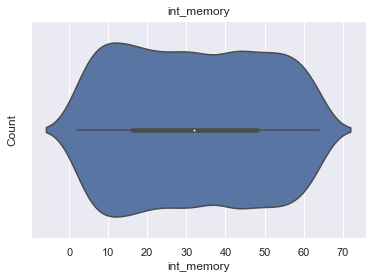

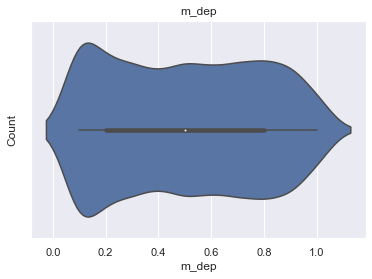

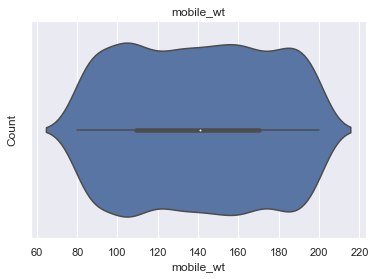

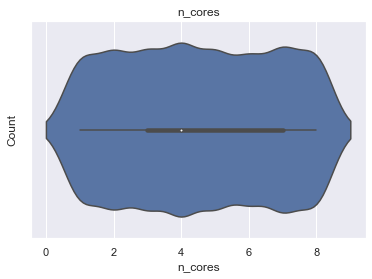

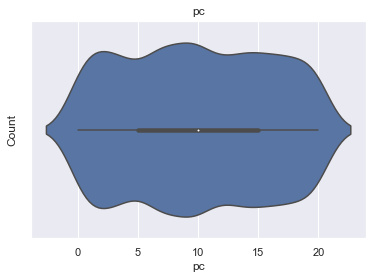

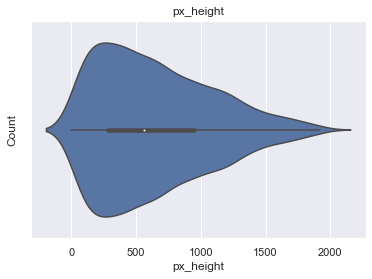

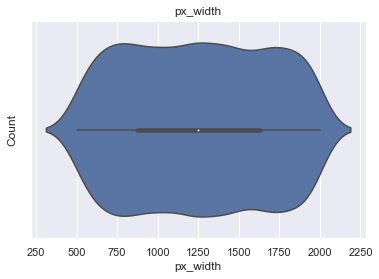

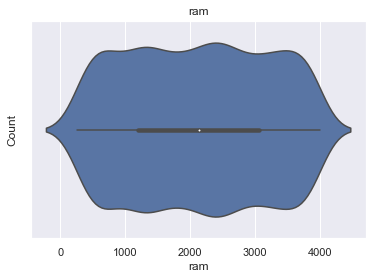

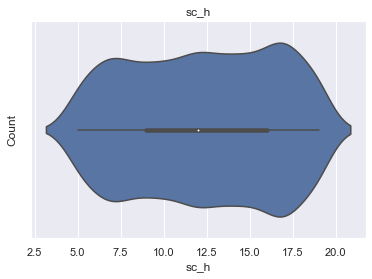

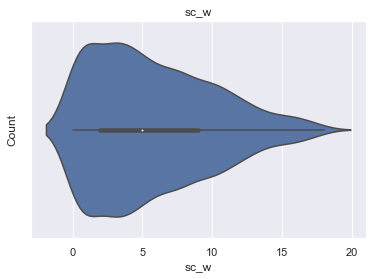

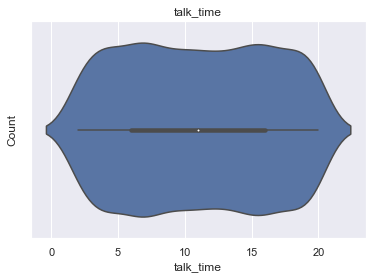

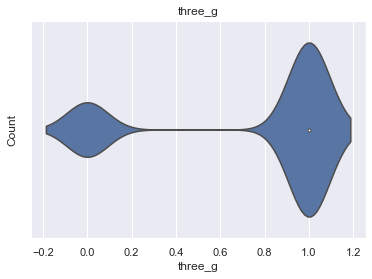

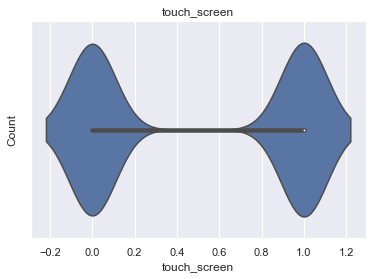

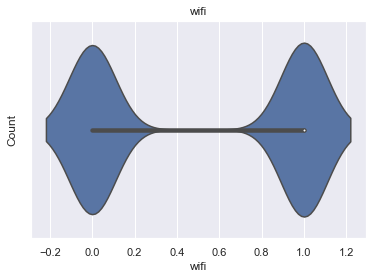

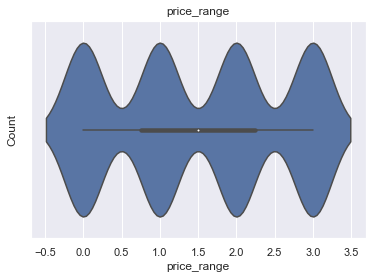

In [42]:
for feature in data:
    data=data.copy()
    sns.violinplot(data=data,x=feature)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

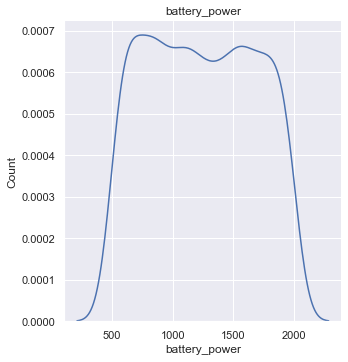

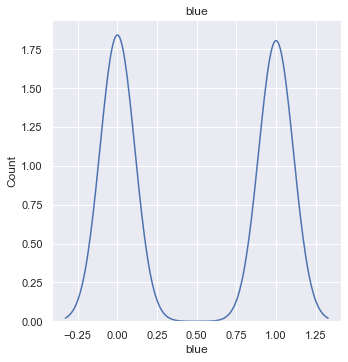

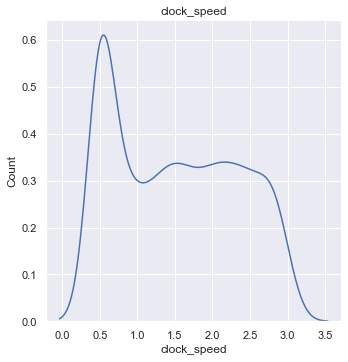

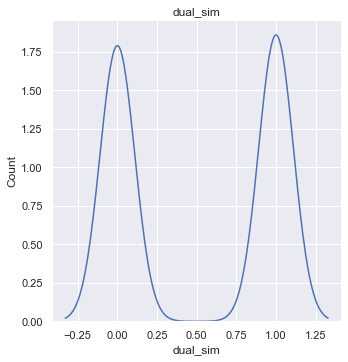

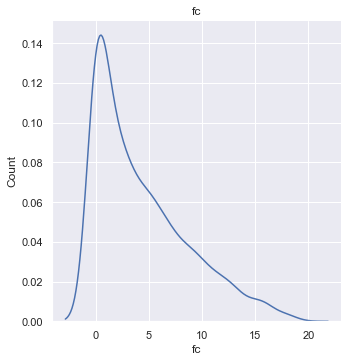

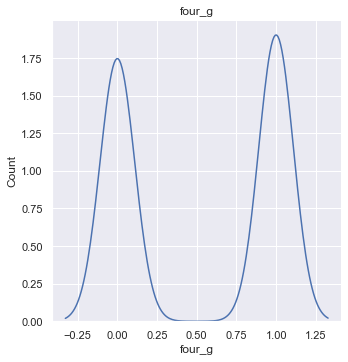

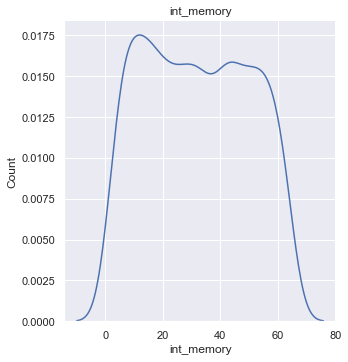

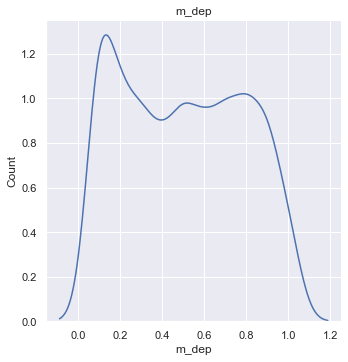

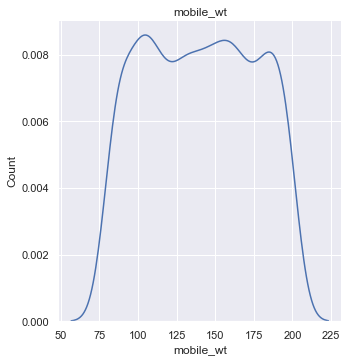

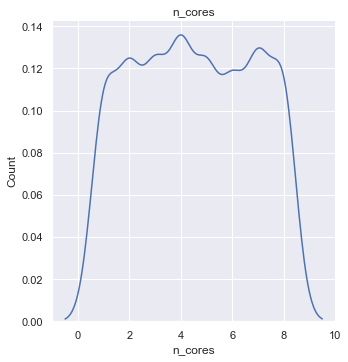

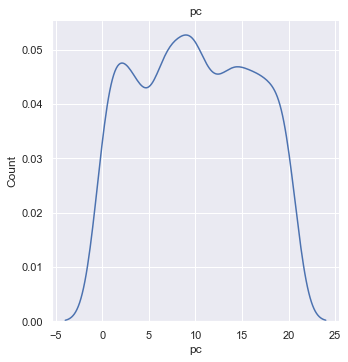

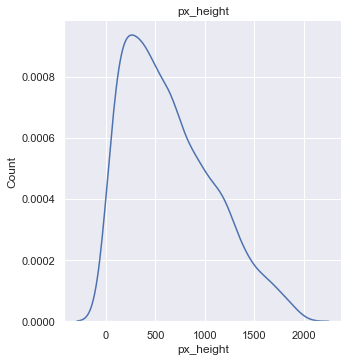

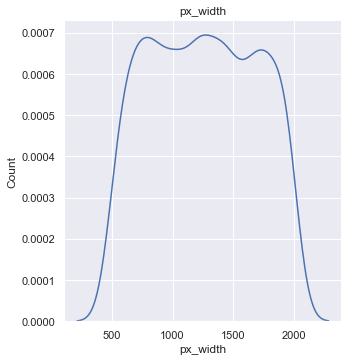

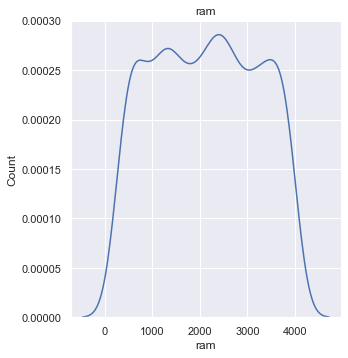

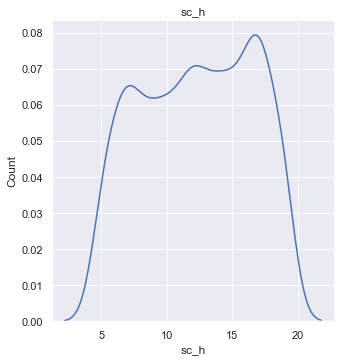

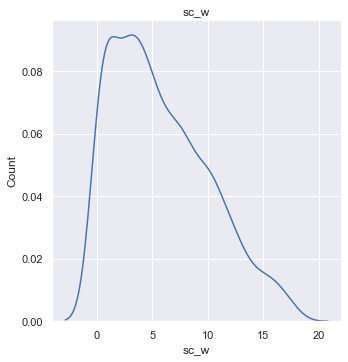

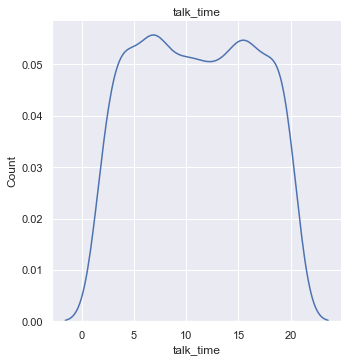

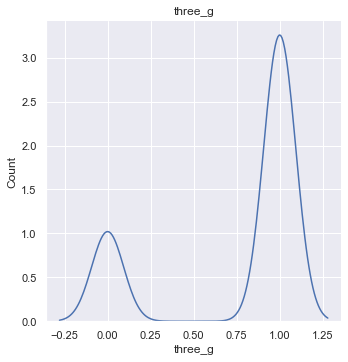

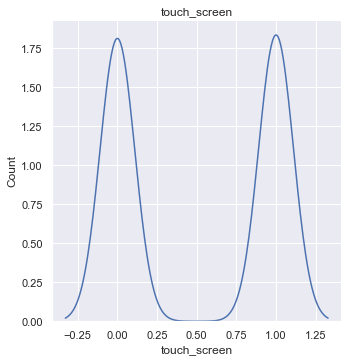

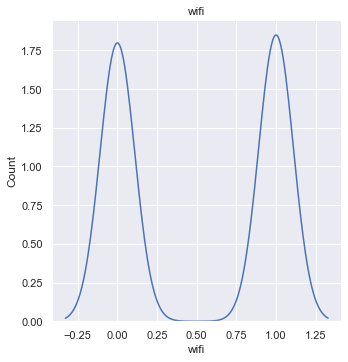

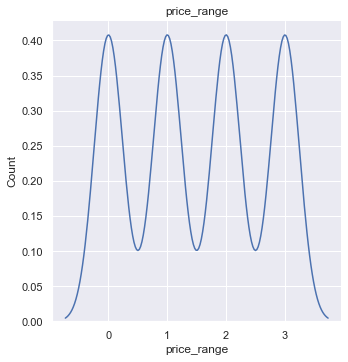

In [43]:
for feature in data:
    data=data.copy()
    sns.displot(data=data,x=feature,kind='kde')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

### Price range vs all numerical factors

<AxesSubplot:xlabel='dual_sim', ylabel='count'>

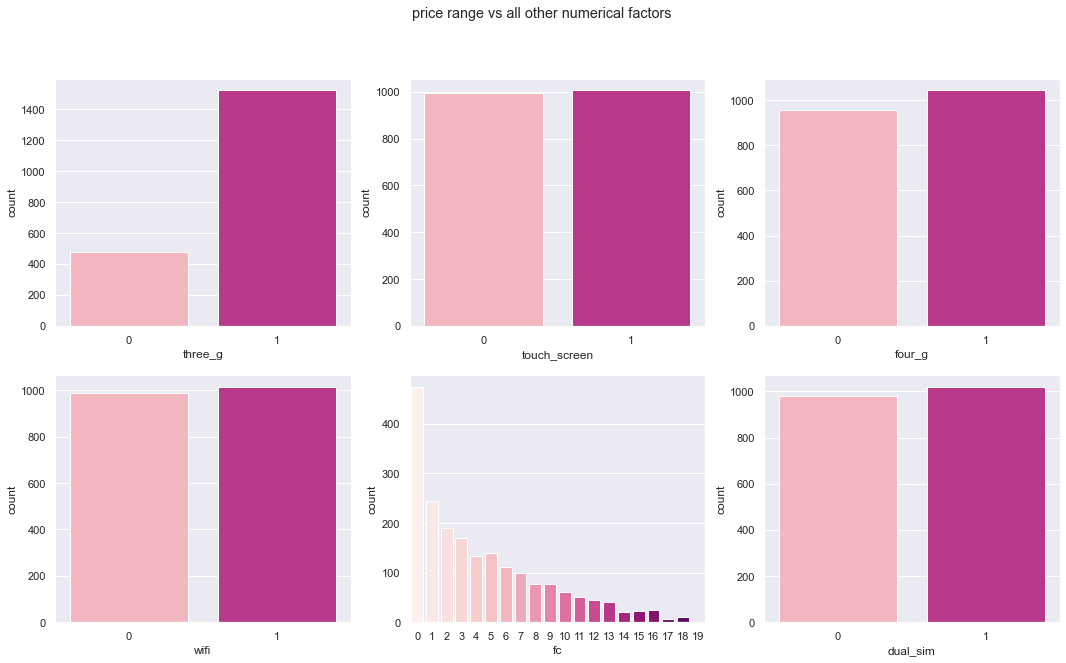

In [44]:
fig,axes=plt.subplots(2,3,figsize=(18,10))
fig.suptitle('price range vs all other numerical factors')
sns.countplot(ax=axes[0,0],data=data,x='three_g',palette='RdPu')
sns.countplot(ax=axes[0,1],data=data,x='touch_screen',palette='RdPu')
sns.countplot(ax=axes[0,2],data=data,x='four_g',palette='RdPu')
sns.countplot(ax=axes[1,0],data=data,x='wifi',palette='RdPu')
sns.countplot(ax=axes[1,1],data=data,x='fc',palette='RdPu')
sns.countplot(ax=axes[1,2],data=data,x='dual_sim',palette='RdPu')

In [45]:
data.sample(20)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
39,560,0,0.5,1,15,0,50,0.3,159,2,20,1448,1613,2150,18,12,11,1,1,0,2
84,1127,1,2.9,1,5,1,57,0.8,163,1,13,928,1049,2048,11,5,17,1,1,1,1
232,1715,0,1.0,1,4,1,31,0.5,83,8,17,638,1615,625,17,6,13,1,0,0,0
1257,1449,1,0.5,1,0,0,52,0.6,105,6,0,211,947,2036,5,1,10,0,1,0,1
1742,657,1,1.9,1,2,0,21,0.1,110,8,8,705,1905,783,6,1,11,1,1,0,0
1114,781,1,1.3,1,1,0,64,0.2,88,2,7,368,607,3862,17,10,9,0,0,0,3
390,1836,1,1.7,1,3,0,26,0.1,134,6,16,408,1139,3097,5,0,18,0,1,0,3
1361,1549,1,1.5,1,0,1,27,0.4,113,5,7,632,1162,436,10,8,11,1,0,0,0
916,816,1,0.5,0,4,0,14,0.9,198,3,13,149,558,1018,17,10,15,1,0,0,0
753,1996,0,2.5,0,5,1,51,0.4,122,4,9,671,1445,2236,8,7,12,1,0,1,2


In [46]:
x=data.drop('price_range',axis=1)
y=data['price_range']
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [47]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

### Feature Selection

#### Applying SelectKBest Algorithm

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ordered_rank_features=SelectKBest(score_func=chi2,k=10)
ordered_feature=ordered_rank_features.fit(x,y)
ordered_rank_features

SelectKBest(score_func=<function chi2 at 0x00000251E057D670>)

In [49]:
dfscores=pd.DataFrame(ordered_feature.scores_,columns=['Score'])
dfcolumns=pd.DataFrame(x.columns)
dfscores

,Score
0,14129.866576
1,0.723232
2,0.648366
3,0.631011
4,10.135166
5,1.521572
6,89.839124
7,0.745820
8,95.972863
9,9.097556


In [50]:
dfcolumns

,0
0,battery_power
1,blue
2,clock_speed
3,dual_sim
4,fc
5,four_g
6,int_memory
7,m_dep
8,mobile_wt
9,n_cores


In [51]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank.sort_values(by='Score',ascending=False)

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


#### Taking top 10 feature variables

In [52]:
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


#### Feature Importance

In [53]:
#This feature gives a score for each feature of your data, the higher the score more relevant it is
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [54]:
print(model.feature_importances_)

[0.06130817 0.01921245 0.03358429 0.01878783 0.0322921  0.01733869
 0.03366662 0.03340776 0.03527875 0.03282148 0.03267595 0.04546762
 0.05000275 0.40126213 0.03300825 0.03374612 0.03432958 0.014391
 0.01785598 0.01956249]


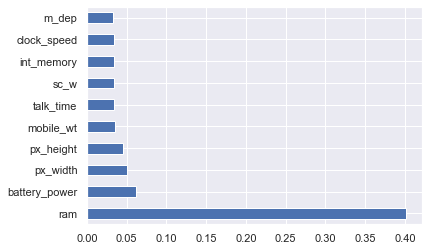

In [55]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

#### Information Gain

In [56]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

ram              0.849141
px_height        0.032025
battery_power    0.030851
px_width         0.027647
fc               0.021998
clock_speed      0.021378
three_g          0.017287
pc               0.014365
int_memory       0.008189
m_dep            0.006542
sc_h             0.006507
talk_time        0.004979
four_g           0.000528
mobile_wt        0.000000
n_cores          0.000000
blue             0.000000
sc_w             0.000000
dual_sim         0.000000
touch_screen     0.000000
wifi             0.000000
dtype: float64

In [57]:
data=data.drop(['wifi','touch_screen','three_g','talk_time','sc_w','dual_sim','four_g','int_memory','blue','n_cores','mobile_wt','m_dep','fc'],axis=1)
data.head()

,battery_power,clock_speed,pc,px_height,px_width,ram,sc_h,price_range
0,842,2.2,2,20,756,2549,9,1
1,1021,0.5,6,905,1988,2631,17,2
2,563,0.5,6,1263,1716,2603,11,2
3,615,2.5,9,1216,1786,2769,16,2
4,1821,1.2,14,1208,1212,1411,8,1


In [58]:
x=data.drop('price_range',axis=1)
y=data['price_range']
print(x.shape)
print(y.shape)

(2000, 7)
(2000,)


### Splitting the dataset into train and test datasets

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 7)
(500, 7)
(1500,)
(500,)


#### Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train

array([[-1.58954736, -0.54409463,  0.69550098, ...,  1.47195821,
         0.79794809,  1.11590168],
       [-1.06204271, -0.42202734, -1.28723859, ..., -1.73439382,
         0.97495824,  1.35539982],
       [ 1.31059626, -0.29996004,  0.86072928, ...,  0.65885313,
         1.15196839,  1.35539982],
       ...,
       [-0.09759213,  0.55451104, -1.45246689, ...,  0.87998086,
         1.4053724 ,  0.15790911],
       [-0.09532817,  1.04278023, -0.4610971 , ...,  1.26465096,
        -1.00010238,  0.39740725],
       [-1.19335288, -1.27649842,  1.52164247, ..., -0.75083612,
         0.29579825, -1.0395816 ]])

#### Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [62]:
y_pred=classifier.predict(x_test)
print(y_pred)

[3 0 2 2 2 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 2 1 3 3 1 3 0 1 2 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 1 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 2 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 3 1 2 2 1 1 0 2 3 3 0 0 1 3 3 2 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 1 0
 1 3 0 3 1 2 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 1 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 1 2 1 1 0 2 1 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 3 2 2 0 0 3 0 1 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 2 2 2 3 0 0
 1 2 1 2 0 3 3 0 2 3 0 2 2 1 0 2 2 1 3 2 2 0 2 0 3 3 2 1 0 3 1 2 0 0 1 3 0
 3 0 0 1 2 0 1 3 0 2 2 1 

In [63]:
from sklearn.metrics import accuracy_score
acc1=accuracy_score(y_test,y_pred)
print(f"Accuracy Score:{acc1}")

Accuracy Score:0.956


#### SVM

In [64]:
from sklearn.svm import SVC
classifier=SVC(kernel='linear',random_state=0)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=0)

### Predict the test set result

In [65]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
acc2=accuracy_score(y_test,y_pred)

[[120   4   0   0]
 [  3 105   2   0]
 [  0   4 115   6]
 [  0   0   6 135]]


In [66]:
print(f'Accrcacy score : {acc2}')

Accrcacy score : 0.95


### Training the K-NN model on the Training set

In [67]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [68]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
acc3=accuracy_score(y_test,y_pred)
print(f'Accuracy Score : {acc3}')

Accuracy Score : 0.77


### Training the Naive Bayes on the Training set

In [69]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [70]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
acc4=accuracy_score(y_test,y_pred)
print(f'Accuracy score : {acc4}')

Accuracy score : 0.828


### Training Decision Tree Classification on Train set

In [71]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [72]:
y_pred=classifier.predict(x_test)
from sklearn.metrics import accuracy_score
acc5=accuracy_score(y_test,y_pred)
print(f'Accuracy Score : {acc5}')

Accuracy Score : 0.866


### Creating Visualization for all models based on their accuracy

In [73]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append('Logistic Regression')
mylist.append(acc2)
mylist2.append('SVM')
mylist.append(acc3)
mylist2.append('KNN')
mylist.append(acc4)
mylist2.append('Naive Bayes')
mylist.append(acc5)
mylist2.append('DTR')

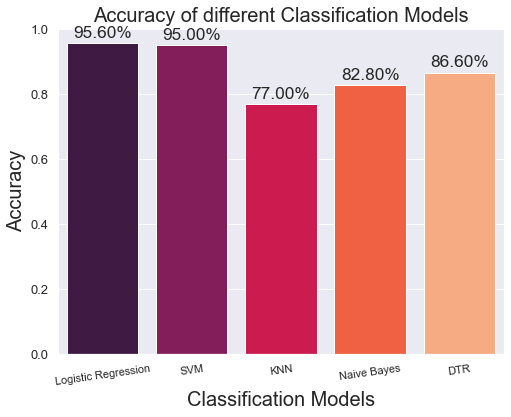

In [74]:
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax=sns.barplot(x=mylist2,y=mylist,palette='rocket',saturation=1.5)
plt.xlabel('Classification Models',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.title('Accuracy of different Classification Models',fontsize=20)
plt.xticks(fontsize=11,horizontalalignment='center',rotation=8)
plt.yticks(fontsize=13)
for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.annotate(f'{height:.2%}',(x + width/2,y+height*1.02),ha='center',fontsize='x-large')
plt.show()